### Libraries

In [1]:
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import texthero as hero
from texthero import preprocessing
from texthero import stopwords
sb.set() # set the default Seaborn style for graphics
from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.feature_extraction.text import CountVectorizer

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#ignore warning
import warnings
warnings.filterwarnings('ignore')

### Chunking CSV to upload onto GitHub

import pandas as pd

chunk_size = 55000
batch_no = 1

for chunk in pd.read_csv('221100_DayZ.csv', chunksize=chunk_size):
    #chunk.to_csv('221100_DayZ' + str(batch_no) + '.csv', index=False)
    #batch_no +=1

### Dataset

In [2]:
steamData = pd.read_csv('steam_data/steam.csv')
steamGames = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_games/steam_games*.csv"))))

#game reviews
firstHalfReviewFiles =glob.glob(os.path.join('', "steam_data/steam_reviews/steam_review_*.csv"))
secondHalfReviewFiles = glob.glob("steam_data/steam_reviews" + '**/**' + "/*.csv")
allReviewFiles = firstHalfReviewFiles + secondHalfReviewFiles
print(len(allReviewFiles))

191


### Cleaning the Dataset

##### renaming and getting the columns we need

In [3]:
#rename for easier identification
steamGames = steamGames.rename(columns={"name": "title"})
steamData = steamData.rename(columns={"name": "title", "genres":"genre"})

#drop columns
steamGames = steamGames[["title", "genre","release_date"]]
steamData = steamData[['title', 'genre', 'release_date','owners','positive_ratings', 'negative_ratings','price']]

#Check got any NA, if got drop
#steamGames.isna().sum()
#steamGames[steamGames['title'].isnull()]
steamGames = steamGames.dropna()

#steamData.isna().sum()

#####  text processing using texthero

In [4]:
# # #text processing for reviews
# default_stopwords = stopwords.DEFAULT
# custom_stopwords = default_stopwords.union(set(["game","mods","/"]))

# custom_pipeline_review = [preprocessing.fillna
#                           , preprocessing.lowercase
#                           , preprocessing.remove_punctuation
#                           , preprocessing.remove_diacritics
#                           , preprocessing.remove_whitespace
#                           ,preprocessing.remove_digits]
#                           #, preprocessing.drop_no_content]

In [5]:
#text processing for title
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace]

steamGames['title'] = hero.clean(steamGames['title'], pipeline = custom_pipeline)
steamData['title'] = hero.clean(steamData['title'], pipeline = custom_pipeline)

In [6]:
# def chunks(lst, n):
#     #Yield successive n-sized chunks from lst
#     for i in range(0, len(lst), n):
#         yield lst[i:i + n]

# listofDF = list()
# for files in chunks(allReviewFiles,20):
#     reviewsDF = pd.concat([pd.read_csv(f, encoding = "ISO-8859-1", engine='python') for f in files])
#     reviewsDF = reviewsDF[["title", "review","voted_up","author.playtime_at_review"]]
#     reviewsDF = reviewsDF.reset_index(drop=True)
    
    
    
#     titleSerie = hero.clean(reviewsDF.title, pipeline = custom_pipeline)
#     reviewSerie = hero.clean(reviewsDF.review, pipeline=custom_pipeline_review)
#     reviewSerie = hero.remove_stopwords(reviewSerie, custom_stopwords)
#     voteSerie = reviewsDF[["voted_up"]]
#     playtimeSerie = reviewsDF[["author.playtime_at_review"]]
    
    
#     reviewsTitle = pd.concat([titleSerie, reviewSerie, voteSerie, playtimeSerie], axis=1).reset_index(drop=True)

#     listofDF.append(reviewsTitle)

In [7]:
# reviewTitleDF = pd.concat(listofDF)

In [8]:
# reviewTitleDF.title.unique()

In [9]:
# reviewTitleDF = reviewTitleDF.rename(columns={"review": "clean_review"})

In [10]:
# reviewTitleDF = reviewTitleDF.replace(r'^\s+$', np.nan, regex=True)

In [11]:
# reviewTitleDF = reviewTitleDF.dropna()
# reviewTitleDF = reviewTitleDF.reset_index()

In [12]:
# reviewTitleDF.isna().sum()

In [13]:
# reviewTitleDF = reviewTitleDF[(reviewTitleDF['author.playtime_at_review'] > 180)]

##### stored clean reviewTitle df in HDFStore as processing take about 11 minutes

In [14]:
store = pd.HDFStore('store.h5')
#store['reviewTitleDF'] = reviewTitleDF  # save it

In [15]:
#this take a while to load also but faster than processing
cleanReviewsTitle = store['reviewTitleDF'] #load it

In [16]:
cleanReviewsTitle = cleanReviewsTitle.reset_index(drop=True)

In [17]:
cleanReviewsTitle

,index,title,clean_review,voted_up,author.playtime_at_review
0,0,7 days to die,turd,True,586.0
1,1,7 days to die,great hope people check see selves,True,5269.0
2,2,7 days to die,good,True,7993.0
3,3,7 days to die,haha bat hit zombie zombie head explode,True,6794.0
4,4,7 days to die,zombie go grrr gun go brrrrrr,True,6504.0
...,...,...,...,...,...
4236900,607321,the elder scrolls v skyrim,easily one best rpg year,True,14070.0
4236901,607322,the elder scrolls v skyrim,epic,True,21594.0
4236902,607324,the elder scrolls v skyrim,waifu simulator oh thank bethesda,True,4736.0
4236903,607325,the elder scrolls v skyrim,get gnomers p fourms damned skyrim suck ...,True,31836.0


##### putting the data into another dataframe 

In [18]:
# steamGames_Title_Genre = steamGames
# steamData_Title_Rating = steamData

##### matching title

In [19]:
# #Genre
# matchTitleGenre = steamGames_Title_Genre.title.isin(cleanReviewsTitle.title)
# steamMatchTitleGenre = steamGames_Title_Genre[matchTitleGenre]
# steamUniqueTitleGenre = steamMatchTitleGenre

# #Rating
# matchTitleRating = steamData_Title_Rating.title.isin(cleanReviewsTitle.title)
# steamMatchTitleRating = steamData_Title_Rating[matchTitleRating]
# steamUniqueTitleRating = steamMatchTitleRating

In [20]:
steamUniqueTitleGenre = steamGames
steamUniqueTitleRating = steamData

In [21]:
gen_cols = [
        'Action',
        'Adventure',
        'Casual',
        'Indie',
        'Massively Multiplayer',
        'RPG',
        'Racing',
        'Simulation',
        'Sports',
        'Strategy'
    ]
    
gen_col_names = []

for col in sorted(gen_cols):
    col_name = col.lower().replace('&', 'and').replace(' ', '_')
    gen_col_names.append(col_name)
        
    steamUniqueTitleGenre[col_name] = steamUniqueTitleGenre['genre'].apply(lambda x: 1 if col in x.split(',') else 0)
    steamUniqueTitleRating[col_name] = steamUniqueTitleRating['genre'].apply(lambda x: 1 if col in x.split(';') else 0)
        # alternate method using np.where:
        # df[col_name] = np.where(df['genres'].str.contains(col), 1, 0)
    
    # remove "non-games" based on genre
    # if a row has all zeros in the new genre columns, it most likely isn't a game, so remove (mostly software)
    gen_sums = steamUniqueTitleGenre[gen_col_names].sum(axis=1)
    steamUniqueTitleGenre = steamUniqueTitleGenre[gen_sums > 0].copy()



In [22]:
steamUniqueTitleRating

,title,genre,release_date,owners,positive_ratings,negative_ratings,price,action,adventure,casual,indie,massively_multiplayer,rpg,racing,simulation,sports,strategy
0,counter strike,Action,2000-11-01,10000000-20000000,124534,3339,7.19,1,0,0,0,0,0,0,0,0,0
1,team fortress classic,Action,1999-04-01,5000000-10000000,3318,633,3.99,1,0,0,0,0,0,0,0,0,0
2,day of defeat,Action,2003-05-01,5000000-10000000,3416,398,3.99,1,0,0,0,0,0,0,0,0,0
3,deathmatch classic,Action,2001-06-01,5000000-10000000,1273,267,3.99,1,0,0,0,0,0,0,0,0,0
4,half life opposing force,Action,1999-11-01,5000000-10000000,5250,288,3.99,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,room of pandora,Adventure;Casual;Indie,2019-04-24,0-20000,3,0,2.09,0,1,1,1,0,0,0,0,0,0
27071,cyber gun,Action;Adventure;Indie,2019-04-23,0-20000,8,1,1.69,1,1,0,1,0,0,0,0,0,0
27072,super star blast,Action;Casual;Indie,2019-04-24,0-20000,0,1,3.99,1,0,1,1,0,0,0,0,0,0
27073,new yankee 7 deer hunters,Adventure;Casual;Indie,2019-04-17,0-20000,2,0,5.19,0,1,1,1,0,0,0,0,0,0


In [23]:
steamUniqueTitleGenre['release_date'] = pd.to_datetime(steamUniqueTitleGenre['release_date'], errors='coerce')
steamUniqueTitleRating['release_date'] = pd.to_datetime(steamUniqueTitleRating['release_date'], errors='coerce')

In [24]:
steamUniqueTitleGenre = steamUniqueTitleGenre.dropna(subset=['release_date'])
steamUniqueTitleRating = steamUniqueTitleRating.dropna(subset=['release_date'])

In [25]:
steamUniqueTitleGenre['release_year'] = steamUniqueTitleGenre['release_date'].apply(lambda x: x.year)
steamUniqueTitleRating['release_year'] =steamUniqueTitleRating['release_date'].apply(lambda x: x.year)

steamUniqueTitleGenre['release_month']= steamUniqueTitleGenre['release_date'].apply(lambda x: x.month)
release_month_year = pd.to_datetime(steamUniqueTitleGenre.release_year.astype(str) + '/' + steamUniqueTitleGenre.release_month.astype(str) + '/01')
release_month_year


0     2016-05-01
1     2017-12-01
2     2018-04-01
3     2018-12-01
4     2003-05-01
         ...    
815   2018-08-01
818   2018-07-01
825   2018-08-01
826   2019-07-01
831   2018-07-01
Length: 14570, dtype: datetime64[ns]

In [26]:
steamUniqueTitleGenre['release_month_year'] = ""

In [27]:
steamUniqueTitleGenre['release_month_year'] = release_month_year

In [28]:
steamUniqueTitleGenre.dtypes

title                            object
genre                            object
release_date             datetime64[ns]
action                            int64
adventure                         int64
casual                            int64
indie                             int64
massively_multiplayer             int64
rpg                               int64
racing                            int64
simulation                        int64
sports                            int64
strategy                          int64
release_year                      int64
release_month                     int64
release_month_year       datetime64[ns]
dtype: object

### Genre

##### split genre into 6 columns

In [29]:
steamUniqueTitleGenre

,title,genre,release_date,action,adventure,casual,indie,massively_multiplayer,rpg,racing,simulation,sports,strategy,release_year,release_month,release_month_year
0,doom,Action,2016-05-12,1,0,0,0,0,0,0,0,0,0,2016,5,2016-05-01
1,playerunknown s battlegrounds,"Action,Adventure,Massively Multiplayer",2017-12-21,1,1,0,0,1,0,0,0,0,0,2017,12,2017-12-01
2,battletech,"Action,Adventure,Strategy",2018-04-24,1,1,0,0,0,0,0,0,0,1,2018,4,2018-04-01
3,dayz,"Action,Adventure,Massively Multiplayer",2018-12-13,1,1,0,0,1,0,0,0,0,0,2018,12,2018-12-01
4,eve online,"Action,Free to Play,Massively Multiplayer,RPG,...",2003-05-06,1,0,0,0,1,1,0,0,0,1,2003,5,2003-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,spaceball in cube,"Action,Indie,Sports",2018-08-26,1,0,0,1,0,0,0,0,1,0,2018,8,2018-08-01
818,air threat small donation,"Action,Casual,Indie",2018-07-13,1,0,1,1,0,0,0,0,0,0,2018,7,2018-07-01
825,galactis,"Action,Indie",2018-08-15,1,0,0,1,0,0,0,0,0,0,2018,8,2018-08-01
826,alive,"Action,Free to Play,Massively Multiplayer,RPG,...",2019-07-11,1,0,0,0,1,1,0,0,0,1,2019,7,2019-07-01


##### dropping genre, title, and release date columns to get the total count of genre

In [30]:
steamGenreCount = steamUniqueTitleGenre.drop(columns=['genre','title', 'release_date','release_year','release_month_year','release_month'])

In [31]:
steamGenreCount.reset_index(drop=True)

,action,adventure,casual,indie,massively_multiplayer,rpg,racing,simulation,sports,strategy
0,1,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1
3,1,1,0,0,1,0,0,0,0,0
4,1,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
14565,1,0,0,1,0,0,0,0,1,0
14566,1,0,1,1,0,0,0,0,0,0
14567,1,0,0,1,0,0,0,0,0,0
14568,1,0,0,0,1,1,0,0,0,1


In [32]:
steamGenreCount_transposed = steamGenreCount.T
steamGenreCount_transposed

,0,1,2,3,4,6,9,12,13,16,...,798,808,810,811,813,815,818,825,826,831
action,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
adventure,0,1,1,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
casual,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
indie,0,0,0,0,0,0,0,0,0,1,...,1,1,1,1,0,1,1,1,0,0
massively_multiplayer,0,1,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
rpg,0,0,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
racing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
simulation,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
sports,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
strategy,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
steamGenreCount_transposed['Total']= steamGenreCount_transposed.sum(axis=1)

In [34]:
steamGenreCount_transposed = steamGenreCount_transposed[['Total']]

In [35]:
steamGenreCount_transposed['genre'] = steamGenreCount_transposed.index

In [36]:
steamGenreCount_transposed = steamGenreCount_transposed.sort_values(by=['Total'],ascending=False)

<AxesSubplot:xlabel='genre', ylabel='Total'>

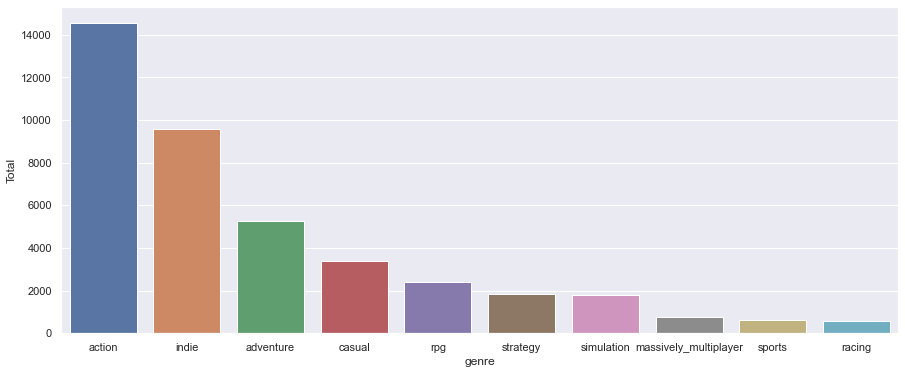

In [37]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sb.barplot(x="genre", y="Total", data=steamGenreCount_transposed, ax=ax)

we found that there are 10 game genres and we see that most of the games' genres are action, indie and adventure. Hence, We can conclude that players are most likely to play these genres compared to the rest.

##### graph to see which genre is most popular 

In [38]:
steamGenre_Date = steamUniqueTitleGenre

In [39]:
#dropping unused columns
steamGenre_Date = steamUniqueTitleGenre[['genre','release_year']]
steamGenre_Date

,genre,release_year
0,Action,2016
1,"Action,Adventure,Massively Multiplayer",2017
2,"Action,Adventure,Strategy",2018
3,"Action,Adventure,Massively Multiplayer",2018
4,"Action,Free to Play,Massively Multiplayer,RPG,...",2003
...,...,...
815,"Action,Indie,Sports",2018
818,"Action,Casual,Indie",2018
825,"Action,Indie",2018
826,"Action,Free to Play,Massively Multiplayer,RPG,...",2019


In [40]:
#steamGenre_Date.to_excel("output.xlsx")

##### storing the top 3 genre individually

In [41]:
action =steamGenre_Date.loc[steamGenre_Date['genre'].str.contains("action", case=False)]
indie =steamGenre_Date.loc[steamGenre_Date['genre'].str.contains("indie", case=False)]
adventure = steamGenre_Date.loc[steamGenre_Date['genre'].str.contains("adventure", case=False)]

In [42]:
action

,genre,release_year
0,Action,2016
1,"Action,Adventure,Massively Multiplayer",2017
2,"Action,Adventure,Strategy",2018
3,"Action,Adventure,Massively Multiplayer",2018
4,"Action,Free to Play,Massively Multiplayer,RPG,...",2003
...,...,...
815,"Action,Indie,Sports",2018
818,"Action,Casual,Indie",2018
825,"Action,Indie",2018
826,"Action,Free to Play,Massively Multiplayer,RPG,...",2019


##### dropping rows that has more than or equal to 2020 and less than 2018 in "release_year" column

In [43]:
# Get names of indexes for which column action has more than or equal to 2020 and drop them
indexAction = action[(action['release_year'] >= 2020)].index
indexAction = action.drop(indexAction , inplace=True)

#Get names of indexes for which column simulation has < 2018 and drop them
indexAction = action[(action['release_year'] < 2008)].index
indexAction = action.drop(indexAction , inplace=True)

# # Get names of indexes for which indie action has more than or equal to 2020 and drop them
indexIndie = indie[(indie['release_year'] >= 2020)].index
indexIndie = indie.drop(indexIndie , inplace=True)

#Get names of indexes for which column simulation has < 2018 and drop them
indexIndie = indie[indie['release_year'] < 2008 ].index
indexIndie = indie.drop(indexIndie , inplace=True)

#Get names of indexes for which column simulation has more than or equal to 2020 and drop them
indexAdventure = adventure[(adventure['release_year'] >= 2020)].index
indexAdventure = adventure.drop(indexAdventure , inplace=True)

#Get names of indexes for which column simulation has < 2018 and drop them
indexAdventure = adventure[adventure['release_year'] < 2008].index
indexAdventure = adventure.drop(indexAdventure , inplace=True)

##### grouping data based on year

In [44]:
groupedAction = action.groupby("release_year").count()
groupedIndie = indie.groupby("release_year").count()
groupedAdventure = adventure.groupby("release_year").count()

#reset index
groupedAction.reset_index(inplace=True)
groupedIndie.reset_index(inplace=True)
groupedAdventure.reset_index(inplace=True)

In [45]:
groupedIndie

,release_year,genre
0,2008,8
1,2009,22
2,2010,29
3,2011,75
4,2012,105
5,2013,163
6,2014,408
7,2015,924
8,2016,1456
9,2017,2087


##### rename and convert the count to corresponding genre

In [46]:
groupedAction = groupedAction.rename(columns={'genre': 'action count'})
groupedAction['action count'] = groupedAction['action count'].astype(int)

groupedIndie = groupedIndie.rename(columns={'genre': 'indie count'}) 
groupedIndie['indie count'] = groupedIndie['indie count'].astype(int)

groupedAdventure = groupedAdventure.rename(columns={'genre': 'adventure count'})
groupedAdventure['adventure count'] = groupedAdventure['adventure count'].astype(int)

##### merge the top 3 dataframes into one for lineplot

In [47]:
genreTimeLine = groupedAction.merge(groupedIndie,on='release_year').merge(groupedAdventure,on='release_year')
genreTimeLine

,release_year,action count,indie count,adventure count
0,2008,39,8,13
1,2009,72,22,14
2,2010,119,29,31
3,2011,164,75,27
4,2012,255,105,63
5,2013,411,163,129
6,2014,684,408,228
7,2015,1330,924,501
8,2016,1979,1456,790
9,2017,2860,2087,1134


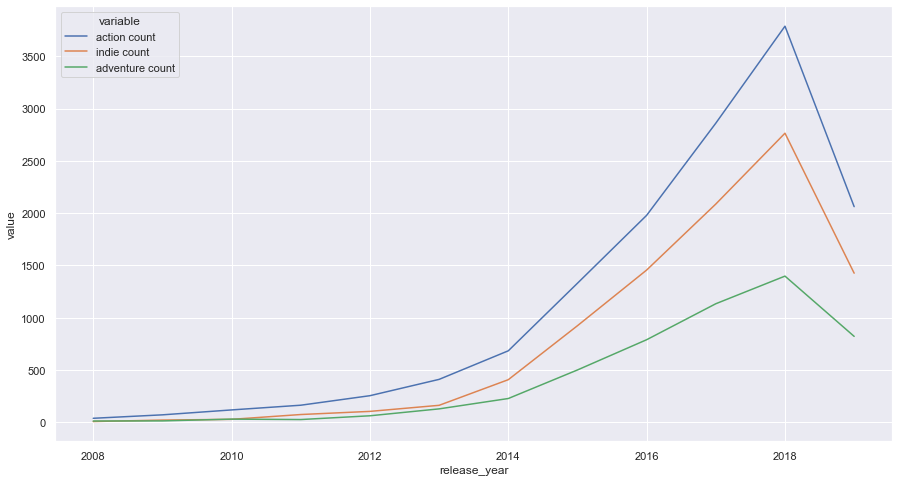

In [48]:
plt.figure(figsize=(15,8))
sb.lineplot(x='release_year', y='value', hue='variable', 
             data=pd.melt(genreTimeLine, ['release_year']))

ya = ax.get_yaxis()
ya.set_major_locator(MaxNLocator(integer=True))

xa = ax.get_xaxis()
xa.set_major_locator(MaxNLocator(integer=True))

plt.show()

We can see that starting from 2014, there is an increase in games release but there is a sharp drop in 2019. 
 
Based on this article, https://gamedaily.biz/article/1489/year-over-year-game-release-numbers-slowed-for-steam-in-2019 , they also said that there is a drop 2019 which is the same as the graph shown above. They mentioned that the drop may be due to the Steam’s notoriously-difficultmarketing and discoverability environment.

In [49]:
all_gen_cols = steamUniqueTitleGenre[['action', 'adventure','casual', 'indie','massively_multiplayer','rpg','racing','simulation','sports','strategy']]

In [50]:
all_gen_cols= all_gen_cols.reset_index(drop=True)

In [51]:
all_gen_cols

,action,adventure,casual,indie,massively_multiplayer,rpg,racing,simulation,sports,strategy
0,1,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1
3,1,1,0,0,1,0,0,0,0,0
4,1,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
14565,1,0,0,1,0,0,0,0,1,0
14566,1,0,1,1,0,0,0,0,0,0
14567,1,0,0,1,0,0,0,0,0,0
14568,1,0,0,0,1,1,0,0,0,1


In [52]:
# gen_cols_matrix = all_gen_cols.corr()

In [53]:
# cmap = sb.diverging_palette(220, 10, as_cmap=True)
# sb.heatmap(all_gen_cols.groupby(['action', 'adventure','casual', 'indie','massively_multiplayer','rpg','racing','simulation','sports','strategy'])
#            .size().unstack(),linewidths=1,annot=True,cbar_kws={"shrink": .5},cmap=cmap,)

In [54]:
print(all_gen_cols.corr())

                       action  adventure    casual     indie  \
action                    NaN        NaN       NaN       NaN   
adventure                 NaN   1.000000  0.007138  0.135392   
casual                    NaN   0.007138  1.000000  0.235474   
indie                     NaN   0.135392  0.235474  1.000000   
massively_multiplayer     NaN   0.023964  0.003487 -0.082661   
rpg                       NaN   0.239136 -0.057726  0.023372   
racing                    NaN  -0.039846  0.079943  0.045006   
simulation                NaN   0.036345  0.161448  0.064723   
sports                    NaN  -0.064489  0.149549  0.056297   
strategy                  NaN   0.001435  0.084417  0.076749   

                       massively_multiplayer       rpg    racing  simulation  \
action                                   NaN       NaN       NaN         NaN   
adventure                           0.023964  0.239136 -0.039846    0.036345   
casual                              0.003487 -0.057726 

In [55]:
print(all_gen_cols.describe())

        action     adventure        casual         indie  \
count  14570.0  14570.000000  14570.000000  14570.000000   
mean       1.0      0.362663      0.232189      0.657241   
std        0.0      0.480785      0.422244      0.474648   
min        1.0      0.000000      0.000000      0.000000   
25%        1.0      0.000000      0.000000      0.000000   
50%        1.0      0.000000      0.000000      1.000000   
75%        1.0      1.000000      0.000000      1.000000   
max        1.0      1.000000      1.000000      1.000000   

       massively_multiplayer           rpg        racing    simulation  \
count           14570.000000  14570.000000  14570.000000  14570.000000   
mean                0.050927      0.165202      0.040288      0.121826   
std                 0.219855      0.371376      0.196641      0.327096   
min                 0.000000      0.000000      0.000000      0.000000   
25%                 0.000000      0.000000      0.000000      0.000000   
50%            

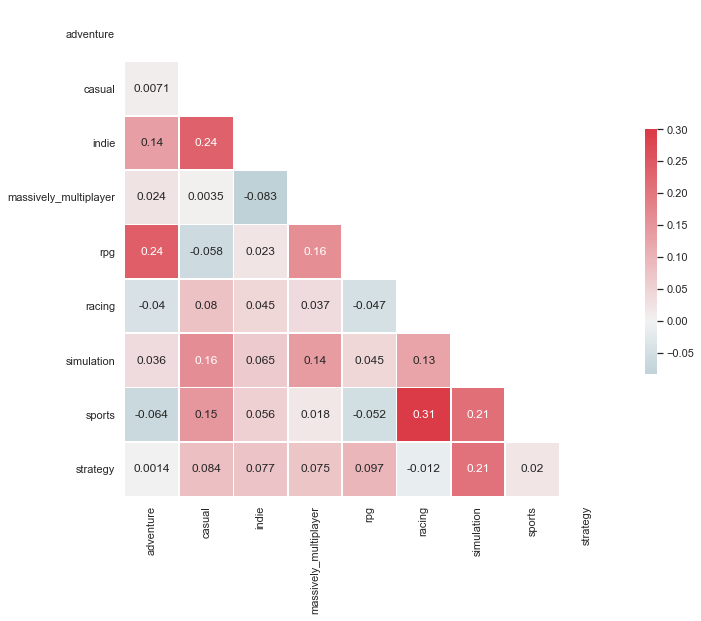

In [56]:
def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sb.set(style='white')
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    f, ax = plt.subplots(figsize=(11,9))
    cmap = sb.diverging_palette(220, 10, as_cmap=True)
    
    sb.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
    
    plt.yticks(rotation=0)
    plt.show()
    plt.rcdefaults()


#plot_correlation_heatmap(all_gen_cols)
plot_correlation_heatmap(all_gen_cols.iloc[:, 1:])

This heatmap is to see which genre types do or do not mix. For example racing games are often sports games. This could be a good starting point to provide the inspiration for a new and original genre experiment.

Note: action column is not appearing as it is all 1 and unchanging. Since it doesn't add information, i remove it.

### Rating 

In [57]:
ratingDF = steamUniqueTitleRating

In [58]:
rating_df =ratingDF[(ratingDF['release_year'] < 2020)]

In [59]:
rating_df =ratingDF[(ratingDF['release_year'] > 2017)]

In [60]:
rating_df=ratingDF[(ratingDF['positive_ratings'] > 500) & (ratingDF['negative_ratings'] > 500)]

In [61]:
rating_df

,title,genre,release_date,owners,positive_ratings,negative_ratings,price,action,adventure,casual,indie,massively_multiplayer,rpg,racing,simulation,sports,strategy,release_year
0,counter strike,Action,2000-11-01,10000000-20000000,124534,3339,7.19,1,0,0,0,0,0,0,0,0,0,2000
1,team fortress classic,Action,1999-04-01,5000000-10000000,3318,633,3.99,1,0,0,0,0,0,0,0,0,0,1999
5,ricochet,Action,2000-11-01,5000000-10000000,2758,684,3.99,1,0,0,0,0,0,0,0,0,0,2000
6,half life,Action,1998-11-08,5000000-10000000,27755,1100,7.19,1,0,0,0,0,0,0,0,0,0,1998
7,counter strike condition zero,Action,2004-03-01,10000000-20000000,12120,1439,7.19,1,0,0,0,0,0,0,0,0,0,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24992,He Luo Qun Xia Chuan ho tu lo shu : the books ...,RPG;Simulation,2018-11-14,20000-50000,851,593,13.50,0,0,0,0,0,1,0,1,0,0,2018
25071,Liao Bu Qi De Xiu Xian Mo Ni Qi,Indie;RPG;Simulation;Strategy;Early Access,2019-01-10,200000-500000,2224,1332,14.49,0,0,0,1,0,1,0,1,0,1,2019
25892,Tan Ling Bi Ji 1v5 notes of soul,Action;Adventure;Indie;Early Access,2019-01-17,200000-500000,4356,601,23.79,1,1,0,1,0,0,0,0,0,0,2019
25950,Gu Jian Qi Tan San gujian3,RPG,2018-12-14,100000-200000,4945,1035,23.79,0,0,0,0,0,1,0,0,0,0,2018


##### getting total ratings

In [62]:
def calc_rating(row):
    """Calculate rating score based on SteamDB method."""
    import math

    pos = row['positive_ratings']
    neg = row['negative_ratings']

    total_reviews = pos + neg
    average = pos / total_reviews
    
    # pulls score towards 50, pulls more strongly for games with few reviews
    score = average - (average*0.5) * 2**(-np.log10(total_reviews + 1))

    return score * 100

In [63]:
rating_df["rating"] = ""

In [64]:
rating_df

,title,genre,release_date,owners,positive_ratings,negative_ratings,price,action,adventure,casual,indie,massively_multiplayer,rpg,racing,simulation,sports,strategy,release_year,rating
0,counter strike,Action,2000-11-01,10000000-20000000,124534,3339,7.19,1,0,0,0,0,0,0,0,0,0,2000,
1,team fortress classic,Action,1999-04-01,5000000-10000000,3318,633,3.99,1,0,0,0,0,0,0,0,0,0,1999,
5,ricochet,Action,2000-11-01,5000000-10000000,2758,684,3.99,1,0,0,0,0,0,0,0,0,0,2000,
6,half life,Action,1998-11-08,5000000-10000000,27755,1100,7.19,1,0,0,0,0,0,0,0,0,0,1998,
7,counter strike condition zero,Action,2004-03-01,10000000-20000000,12120,1439,7.19,1,0,0,0,0,0,0,0,0,0,2004,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24992,He Luo Qun Xia Chuan ho tu lo shu : the books ...,RPG;Simulation,2018-11-14,20000-50000,851,593,13.50,0,0,0,0,0,1,0,1,0,0,2018,
25071,Liao Bu Qi De Xiu Xian Mo Ni Qi,Indie;RPG;Simulation;Strategy;Early Access,2019-01-10,200000-500000,2224,1332,14.49,0,0,0,1,0,1,0,1,0,1,2019,
25892,Tan Ling Bi Ji 1v5 notes of soul,Action;Adventure;Indie;Early Access,2019-01-17,200000-500000,4356,601,23.79,1,1,0,1,0,0,0,0,0,0,2019,
25950,Gu Jian Qi Tan San gujian3,RPG,2018-12-14,100000-200000,4945,1035,23.79,0,0,0,0,0,1,0,0,0,0,2018,


In [65]:
#keep lower bound of owners column, as integer
rating_df['owners'] = rating_df['owners'].str.split('-').apply(lambda x: x[0]).astype(int)

# calculate rating, as well as simple ratio for comparison
rating_df['total_ratings'] = rating_df['positive_ratings'] + rating_df['negative_ratings']
rating_df['rating_ratio'] = rating_df['positive_ratings'] / rating_df['total_ratings']
rating_df['rating'] = rating_df.apply(calc_rating, axis=1)

In [66]:
rating_df[rating_df["price"] == 0]

,title,genre,release_date,owners,positive_ratings,negative_ratings,price,action,adventure,casual,...,massively_multiplayer,rpg,racing,simulation,sports,strategy,release_year,rating,total_ratings,rating_ratio
11,half life source,Action,2004-06-01,2000000,3767,1053,0.0,1,0,0,...,0,0,0,0,0,0,2004,75.111355,4820,0.781535
14,half life 2 lost coast,Action,2005-10-27,10000000,5783,1020,0.0,1,0,0,...,0,0,0,0,0,0,2005,82.023667,6803,0.850066
19,team fortress 2,Action;Free to Play,2007-10-10,20000000,515879,34036,0.0,1,0,0,...,0,0,0,0,0,0,2007,92.933233,549915,0.938107
22,dota 2,Action;Free to Play;Strategy,2013-07-09,100000000,863507,142079,0.0,1,0,0,...,0,0,0,0,0,1,2013,85.201281,1005586,0.858710
24,alien swarm,Action,2010-07-19,2000000,17435,941,0.0,1,0,0,...,0,0,0,0,0,0,2010,92.410501,18376,0.948792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23163,cuisine royale,Action;Free to Play;Massively Multiplayer;Earl...,2018-06-15,1000000,9657,2964,0.0,1,0,0,...,1,0,0,0,0,0,2018,74.286096,12621,0.765153
23449,creative destruction,Action;Adventure;Casual;Massively Multiplayer,2018-08-02,500000,4323,1127,0.0,1,1,1,...,1,0,0,0,0,0,2018,76.345550,5450,0.793211
24165,modern combat 5,Action;Free to Play;Massively Multiplayer,2018-10-24,200000,589,774,0.0,1,0,0,...,1,0,0,0,0,0,2018,40.753606,1363,0.432135
24173,dissidia final fantasy nt free edition,Action;Free to Play,2019-03-12,200000,620,1005,0.0,1,0,0,...,0,0,0,0,0,0,2019,36.093858,1625,0.381538


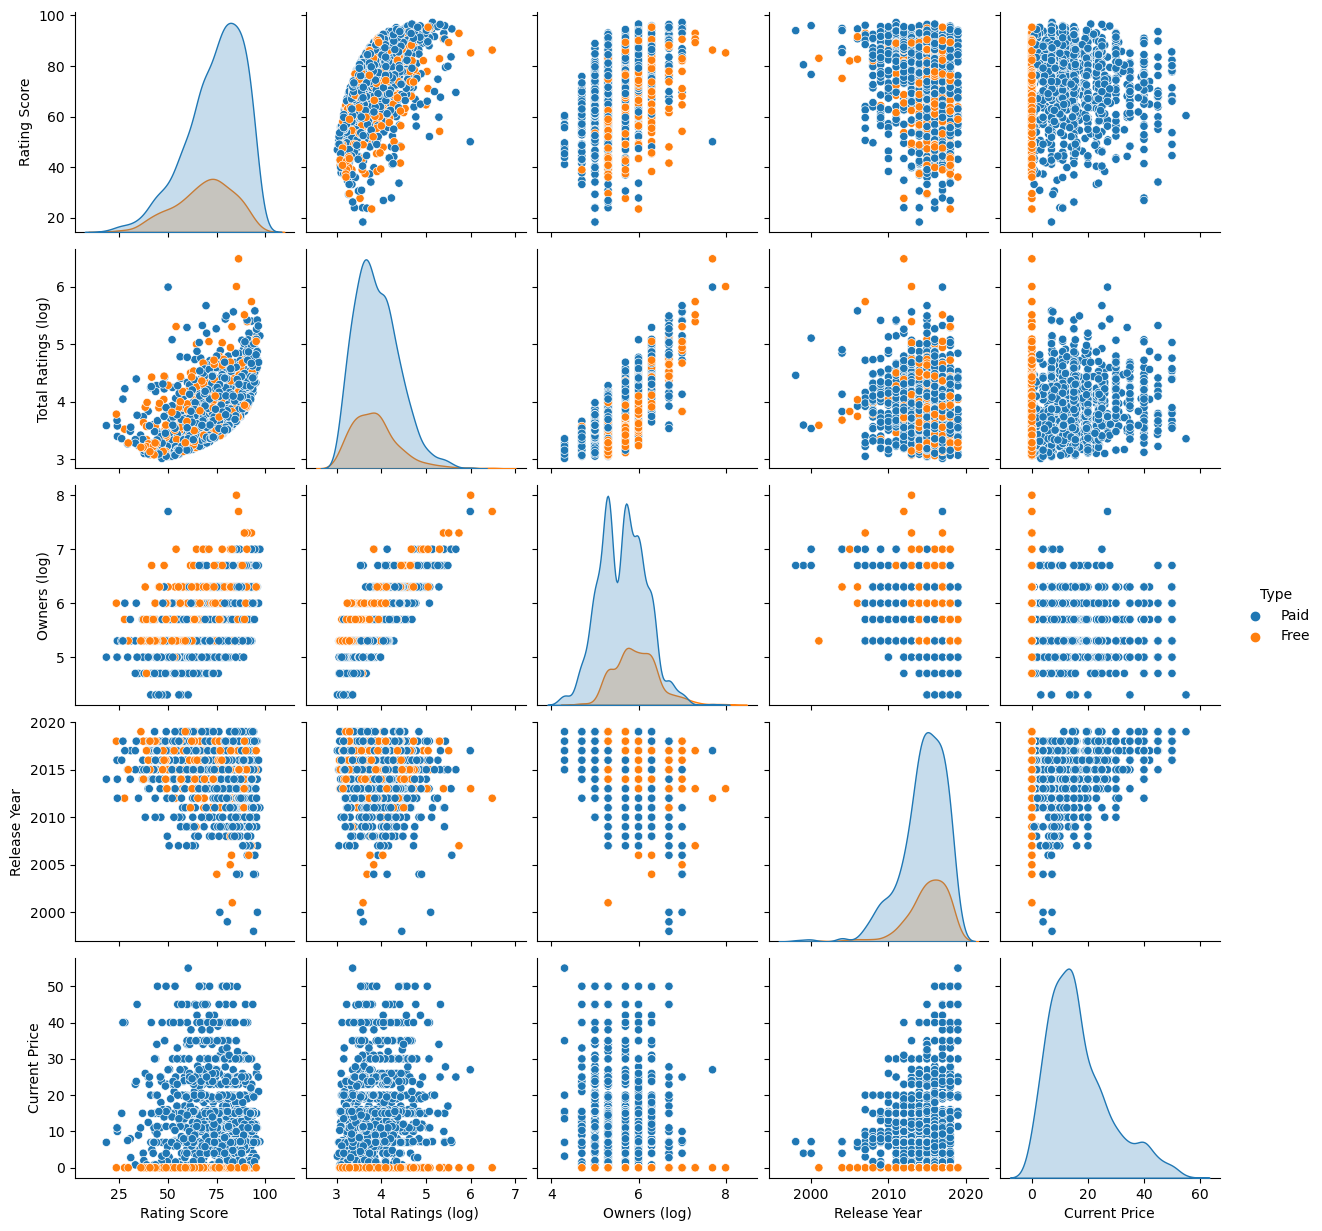

In [67]:
# Create a column to split free vs paid games
rating_df['type'] = 'Free'
rating_df.loc[rating_df['price'] > 0, 'type'] = 'Paid'

# ensure no 0s in columns we're applying log to
df = rating_df[(rating_df['owners'] > 0) & (rating_df['total_ratings'] > 0)].copy()

eda_df = pd.DataFrame(zip(df['rating'],
                          np.log10(df['total_ratings']),
                          np.log10(df['owners']),
                          df['release_year'],
                          df.price,
                          df['type']
                         ),
                      columns=['Rating Score', 'Total Ratings (log)', 'Owners (log)', 'Release Year', 'Current Price', 'Type'])

sb.pairplot(eda_df, hue='Type')
plt.show()

We can see that: 
- paid games look to have higher ratings on average than free games
- there are more owners for paid than free games
- more ratings are given to paid games than free ones
- the more owners of a game, the higher ratings it has
- more recent games are more expensive

We can conclude that:
- As price increases, rating increases, so it's possible people are more likely to rate a game highly if they have spent more money on purchasing it. 
- The more owners of a game, the more ratings it has. This suggests that the better rated a game, the more people buy it

In [68]:
action = rating_df.loc[rating_df['genre'].str.contains("action", case=False)]
indie =rating_df.loc[rating_df['genre'].str.contains("indie", case=False)]
simulation = rating_df.loc[rating_df['genre'].str.contains("simulation", case=False)]
strategy = rating_df.loc[rating_df['genre'].str.contains("strategy", case=False)]
rpg = rating_df.loc[ratingDF['genre'].str.contains("rpg", case=False)]
sports = rating_df.loc[rating_df['genre'].str.contains("sports", case=False)]
racing = rating_df.loc[rating_df['genre'].str.contains("racing", case=False)]
casual = rating_df.loc[rating_df['genre'].str.contains("casual", case=False)]
massively_multiplayer = rating_df.loc[rating_df['genre'].str.contains("massively multiplayer", case=False)]
adventure = rating_df.loc[rating_df['genre'].str.contains("adventure", case=False)]

##### summing all the postive rating and negative rating separately

In [69]:
#action
action_posRating = action['positive_ratings'].sum()    
action_negRating = action['negative_ratings'].sum() 

#indie
indie_posRating = indie['positive_ratings'].sum()    
indie_negRating = indie['negative_ratings'].sum()  

#simulation
simulation_posRating = simulation['positive_ratings'].sum()    
simulation_negRating = simulation['negative_ratings'].sum() 

#strategy
strategy_posRating = strategy['positive_ratings'].sum()    
strategy_negRating = strategy['negative_ratings'].sum()

#rpg
rpg_posRating = rpg['positive_ratings'].sum()    
rpg_negRating = rpg['negative_ratings'].sum()

#sports
sports_posRating = sports['positive_ratings'].sum()    
sports_negRating = sports['negative_ratings'].sum()

#racing
racing_posRating = racing['positive_ratings'].sum()    
racing_negRating = racing['negative_ratings'].sum()

#casual
casual_posRating = casual['positive_ratings'].sum()    
casual_negRating = casual['negative_ratings'].sum()

#massively_multiplayer
massively_multiplayer_posRating = massively_multiplayer['positive_ratings'].sum()    
massively_multiplayer_negRating = massively_multiplayer['negative_ratings'].sum()

#adventure
adventure_posRating = adventure['positive_ratings'].sum()    
adventure_negRating = adventure['negative_ratings'].sum()

In [70]:
# initialize data of lists.
data = {'genre':['action', 'indie', 'simulation', 'strategy', 'rpg', 'sports', 'racing', 'casual', 'massively_multiplayer', 'adventure'],
        'positive_ratings':[action_posRating, indie_posRating, simulation_posRating, strategy_posRating, rpg_posRating, sports_posRating, racing_posRating, casual_posRating, massively_multiplayer_posRating, adventure_posRating],
        'negative_ratings':[action_negRating, indie_negRating, simulation_negRating, strategy_negRating, rpg_negRating, sports_negRating, racing_negRating, casual_negRating, massively_multiplayer_negRating, adventure_negRating]
       }
  
# Create DataFrame
genreRating = pd.DataFrame(data)

In [71]:
#sum_column = genreRating["positive_ratings"] + genreRating["negative_ratings"]
#genreRating["total_ratings"] = sum_column

In [72]:
genreRating = genreRating.set_index('genre')

In [73]:
genreRating = genreRating.div(genreRating.sum(axis=1), axis=0)*100

In [74]:
genreRating

,positive_ratings,negative_ratings
genre,,
action,81.573179,18.426821
indie,86.670234,13.329766
simulation,84.250147,15.749853
strategy,83.477039,16.522961
rpg,83.001703,16.998297
sports,79.610412,20.389588
racing,84.573414,15.426586
casual,87.025284,12.974716
massively_multiplayer,64.664555,35.335445


Text(0.5, 0, 'rating in percentage')

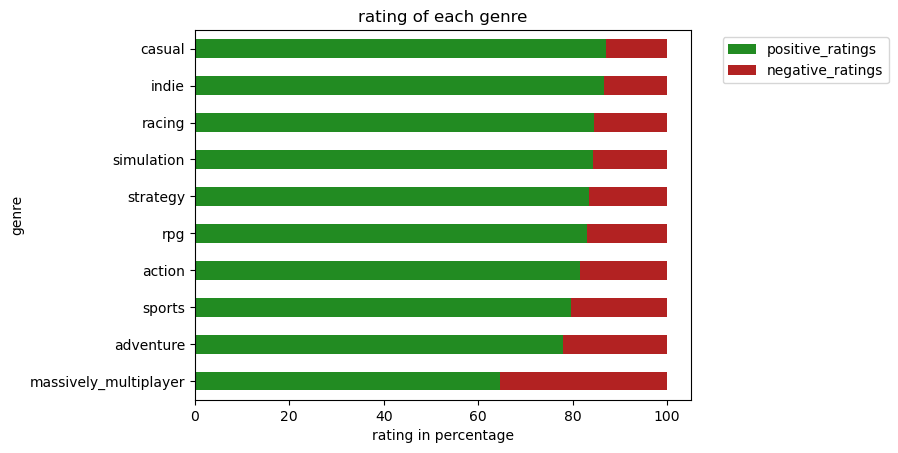

In [75]:
genreRating.sort_values(by='positive_ratings',ascending=True).plot(kind = 'barh', stacked = True, color=("forestgreen","firebrick"))
plt.legend(bbox_to_anchor=(1.05,1))
plt.title("rating of each genre")
plt.xlabel("rating in percentage")

we can see that casual and indie have a lot more postive ratings compared to the rest. We thought that action would receive more postive rating as it is considered the most popular genre. The reason why simulation and indie has more postive rating may be due to factors such as lenghth of game play and content of the game which we will explore later.

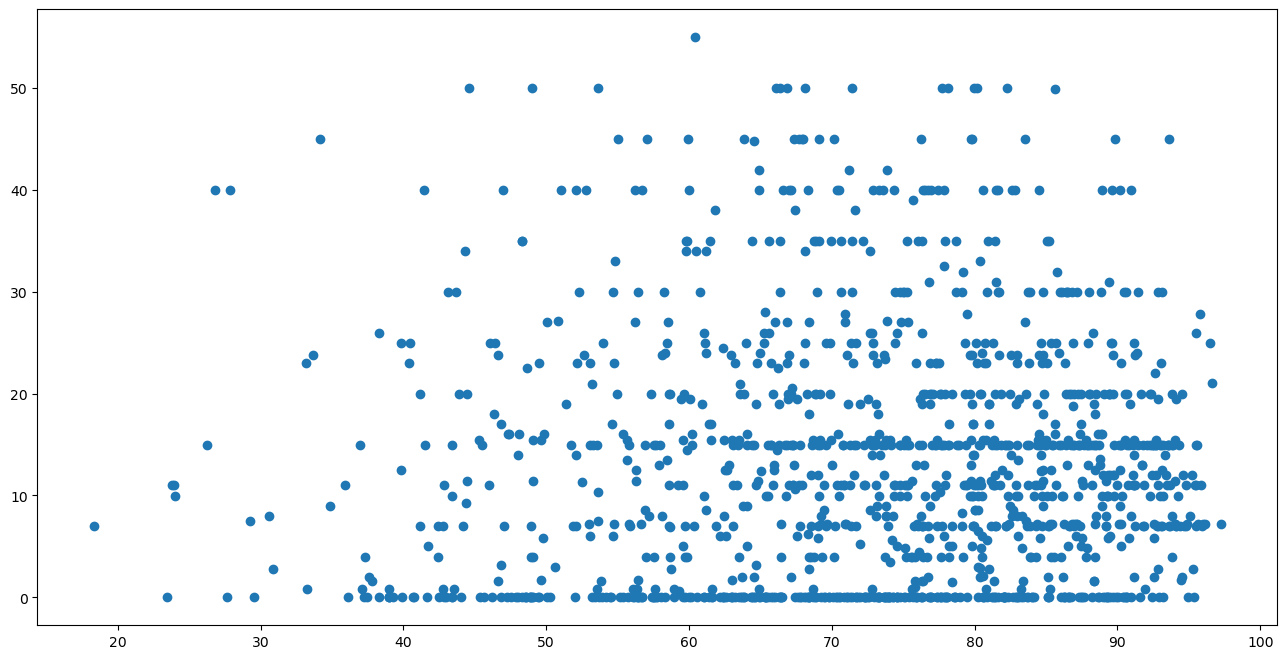

In [76]:
# Extract the Features from the Data
X = pd.DataFrame(rating_df[["rating", "price"]])

# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "rating", y = "price", data = X)

In [77]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Guess the Number of Clusters
num_clust = 3

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_clusters=3)

In [78]:
# Print the Cluster Centers
print("Features", "\trating", "\tprice")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()

Features 	rating 	price

Cluster 0:	82.74	9.33	
Cluster 1:	71.8	32.39	
Cluster 2:	54.93	7.46	


<AxesSubplot:xlabel='Cluster', ylabel='count'>

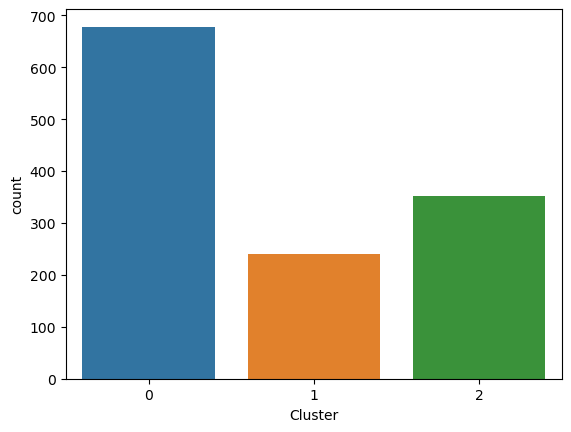

In [79]:
# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(x=X_labeled["Cluster"])

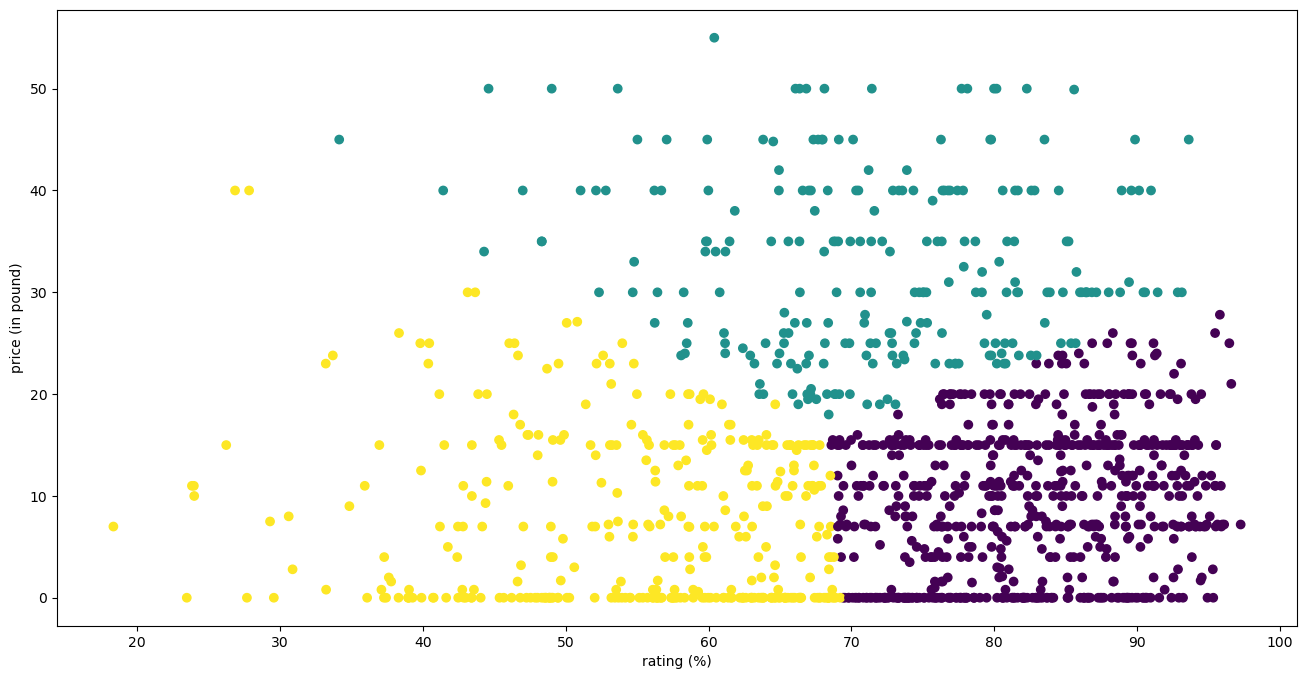

In [80]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.xlabel("rating (%)")
plt.ylabel("price (in pound)")
plt.scatter(x = "rating", y = "price", c = "Cluster", cmap = 'viridis', data = X_labeled)

We see that there are 3 clusters, 
- the yellow cluster represents normal to low rating with low price.
- the green cluster represents normal rating with high price.
- the purple cluster represents high rating with low price.


We want to aim for the purple cluster to be more popular and earn more.

### Reviews

In [81]:
cleanReviewsTitle

,index,title,clean_review,voted_up,author.playtime_at_review
0,0,7 days to die,turd,True,586.0
1,1,7 days to die,great hope people check see selves,True,5269.0
2,2,7 days to die,good,True,7993.0
3,3,7 days to die,haha bat hit zombie zombie head explode,True,6794.0
4,4,7 days to die,zombie go grrr gun go brrrrrr,True,6504.0
...,...,...,...,...,...
4236900,607321,the elder scrolls v skyrim,easily one best rpg year,True,14070.0
4236901,607322,the elder scrolls v skyrim,epic,True,21594.0
4236902,607324,the elder scrolls v skyrim,waifu simulator oh thank bethesda,True,4736.0
4236903,607325,the elder scrolls v skyrim,get gnomers p fourms damned skyrim suck ...,True,31836.0


In [82]:
mask = (cleanReviewsTitle['clean_review'].str.len() > 20)

In [83]:
cleanReviewsTitle = cleanReviewsTitle.loc[mask]

In [84]:
cleanReviewsTitle

,index,title,clean_review,voted_up,author.playtime_at_review
1,1,7 days to die,great hope people check see selves,True,5269.0
3,3,7 days to die,haha bat hit zombie zombie head explode,True,6794.0
4,4,7 days to die,zombie go grrr gun go brrrrrr,True,6504.0
5,5,7 days to die,tthot thare wood blox,False,2508.0
7,7,7 days to die,fun great friends good challenging times ...,True,762.0
...,...,...,...,...,...
4236899,607320,the elder scrolls v skyrim,want see open world looking rpg year ...,True,5374.0
4236900,607321,the elder scrolls v skyrim,easily one best rpg year,True,14070.0
4236902,607324,the elder scrolls v skyrim,waifu simulator oh thank bethesda,True,4736.0
4236903,607325,the elder scrolls v skyrim,get gnomers p fourms damned skyrim suck ...,True,31836.0


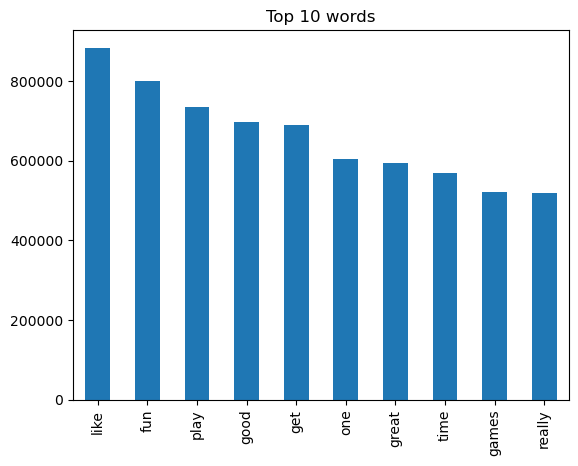

In [85]:

NUM_TOP_WORDS = 10

top_10 = hero.visualization.top_words(cleanReviewsTitle['clean_review']).head(NUM_TOP_WORDS)

# Draw the bar chart

top_10.plot.bar(rot=90, title="Top 10 words");
fig.set_size_inches(18.5, 10.5)
plt.show(block=True);

we can see the top 10 words used in the review section. We can see that there are quite a lot of  postive words.

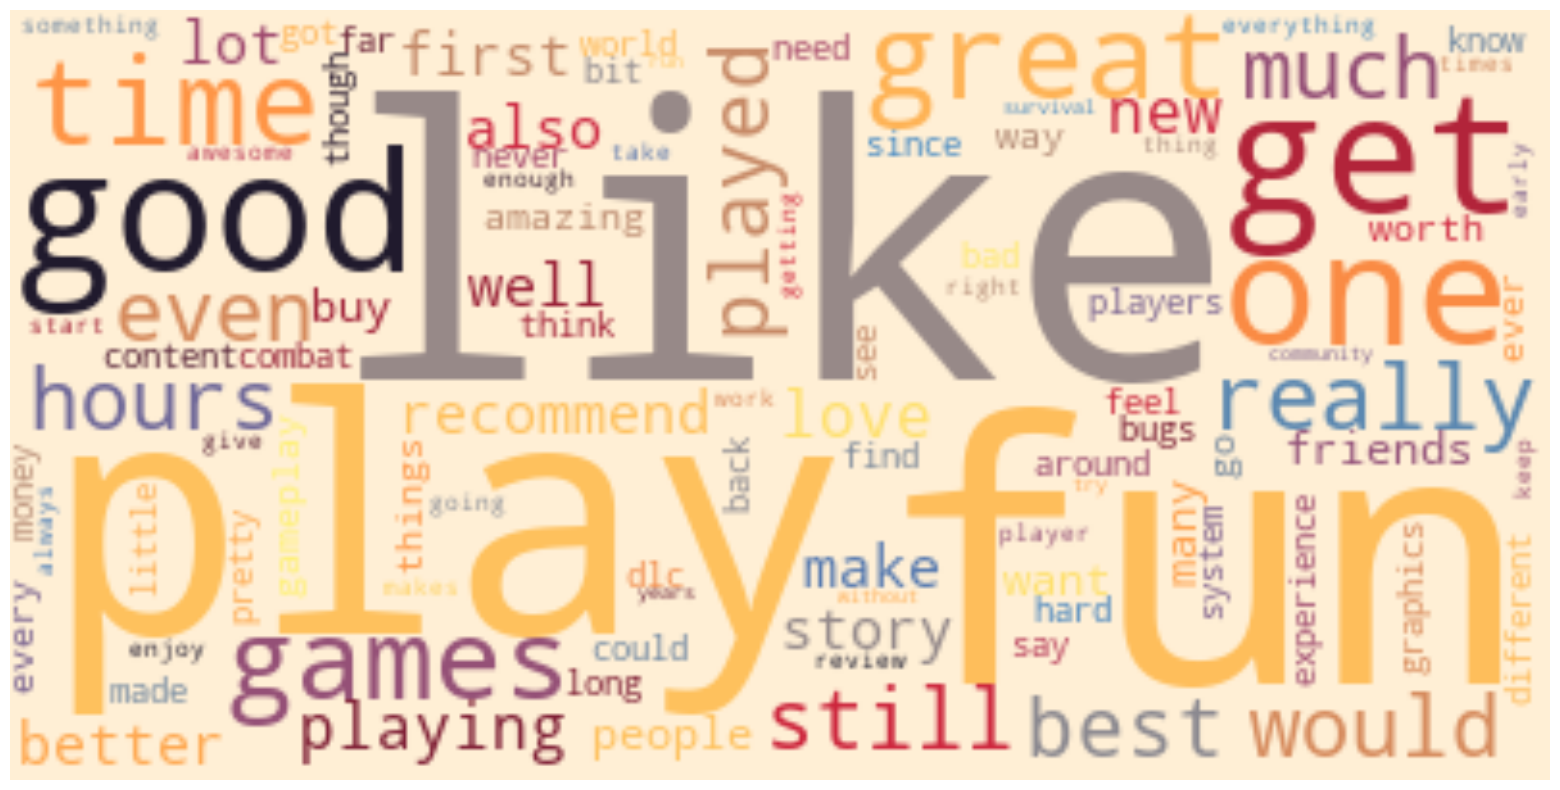

In [86]:
hero.wordcloud(cleanReviewsTitle['clean_review'], max_words=100,)

Some popular words that can be observed here include “good,” “fun" and "great". Also, there are some negative words such
as "bad" and "bugs". However, there are more postivive word, indicating that most reviews in the dataset express a positive sentiment.

In [87]:
cleanReviewsTitle

,index,title,clean_review,voted_up,author.playtime_at_review
1,1,7 days to die,great hope people check see selves,True,5269.0
3,3,7 days to die,haha bat hit zombie zombie head explode,True,6794.0
4,4,7 days to die,zombie go grrr gun go brrrrrr,True,6504.0
5,5,7 days to die,tthot thare wood blox,False,2508.0
7,7,7 days to die,fun great friends good challenging times ...,True,762.0
...,...,...,...,...,...
4236899,607320,the elder scrolls v skyrim,want see open world looking rpg year ...,True,5374.0
4236900,607321,the elder scrolls v skyrim,easily one best rpg year,True,14070.0
4236902,607324,the elder scrolls v skyrim,waifu simulator oh thank bethesda,True,4736.0
4236903,607325,the elder scrolls v skyrim,get gnomers p fourms damned skyrim suck ...,True,31836.0


In [88]:
cleanReviewsTitle.loc[cleanReviewsTitle['voted_up'] == True, 'sentimental'] = 1
cleanReviewsTitle.loc[cleanReviewsTitle['voted_up'] == False, 'sentimental'] = -1

In [89]:
cleanReviewsTitle.dtypes

index                          int64
title                         object
clean_review                  object
voted_up                      object
author.playtime_at_review    float64
sentimental                  float64
dtype: object

In [90]:
cleanReviewsTitle['sentimental'] = cleanReviewsTitle['sentimental'].astype(int)

In [91]:
cleanReviewsTitle

,index,title,clean_review,voted_up,author.playtime_at_review,sentimental
1,1,7 days to die,great hope people check see selves,True,5269.0,1
3,3,7 days to die,haha bat hit zombie zombie head explode,True,6794.0,1
4,4,7 days to die,zombie go grrr gun go brrrrrr,True,6504.0,1
5,5,7 days to die,tthot thare wood blox,False,2508.0,-1
7,7,7 days to die,fun great friends good challenging times ...,True,762.0,1
...,...,...,...,...,...,...
4236899,607320,the elder scrolls v skyrim,want see open world looking rpg year ...,True,5374.0,1
4236900,607321,the elder scrolls v skyrim,easily one best rpg year,True,14070.0,1
4236902,607324,the elder scrolls v skyrim,waifu simulator oh thank bethesda,True,4736.0,1
4236903,607325,the elder scrolls v skyrim,get gnomers p fourms damned skyrim suck ...,True,31836.0,1


In [92]:
positive = cleanReviewsTitle[cleanReviewsTitle['sentimental'] == 1]
negative = cleanReviewsTitle[cleanReviewsTitle['sentimental'] == -1]

In [93]:
negative

,index,title,clean_review,voted_up,author.playtime_at_review,sentimental
5,5,7 days to die,tthot thare wood blox,False,2508.0,-1
10,10,7 days to die,good back days dying like rust gmod ...,False,11130.0,-1
27,28,7 days to die,still recommended instead fixing horrible z...,False,36710.0,-1
50,51,7 days to die,since first released like years ago ...,False,57262.0,-1
57,58,7 days to die,worth buy watch streamer play honestly ...,False,201.0,-1
...,...,...,...,...,...,...
4231335,601618,the elder scrolls v skyrim,way hyped ok time sinker shit ...,False,622.0,-1
4231347,601630,the elder scrolls v skyrim,na boa bons gra!ficos mas jogo (c) decepciona...,False,10724.0,-1
4231380,601664,the elder scrolls v skyrim,cant sex anyone living dead kill children,False,2643.0,-1
4231433,601719,the elder scrolls v skyrim,level scaling thing cant fucking balance...,False,1998.0,-1


In [120]:
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
#add a list of stopwords to the stopwords
custom_stopwords = default_stopwords.union(set(["like","get","games","game","play","fun","good","really","even","would","still","one","much","great","make","buy","people","want","go", "got","many","first","every","way","also"]))
#Call remove_stopwords and pass the custom_stopwords list
negative['clean_review'] = hero.remove_stopwords(negative['clean_review'], custom_stopwords)

In [95]:
negative

,index,title,clean_review,voted_up,author.playtime_at_review,sentimental
5,5,7 days to die,tthot thare wood blox,False,2508.0,-1
10,10,7 days to die,back days dying rust gmod others ...,False,11130.0,-1
27,28,7 days to die,recommended instead fixing horrible zombie...,False,36710.0,-1
50,51,7 days to die,since first released years ago ...,False,57262.0,-1
57,58,7 days to die,worth buy watch streamer honestly ...,False,201.0,-1
...,...,...,...,...,...,...
4231335,601618,the elder scrolls v skyrim,way hyped ok time sinker shit ...,False,622.0,-1
4231347,601630,the elder scrolls v skyrim,na boa bons gra!ficos mas jogo (c) decepciona...,False,10724.0,-1
4231380,601664,the elder scrolls v skyrim,cant sex anyone living dead kill children,False,2643.0,-1
4231433,601719,the elder scrolls v skyrim,level scaling thing cant fucking balance...,False,1998.0,-1


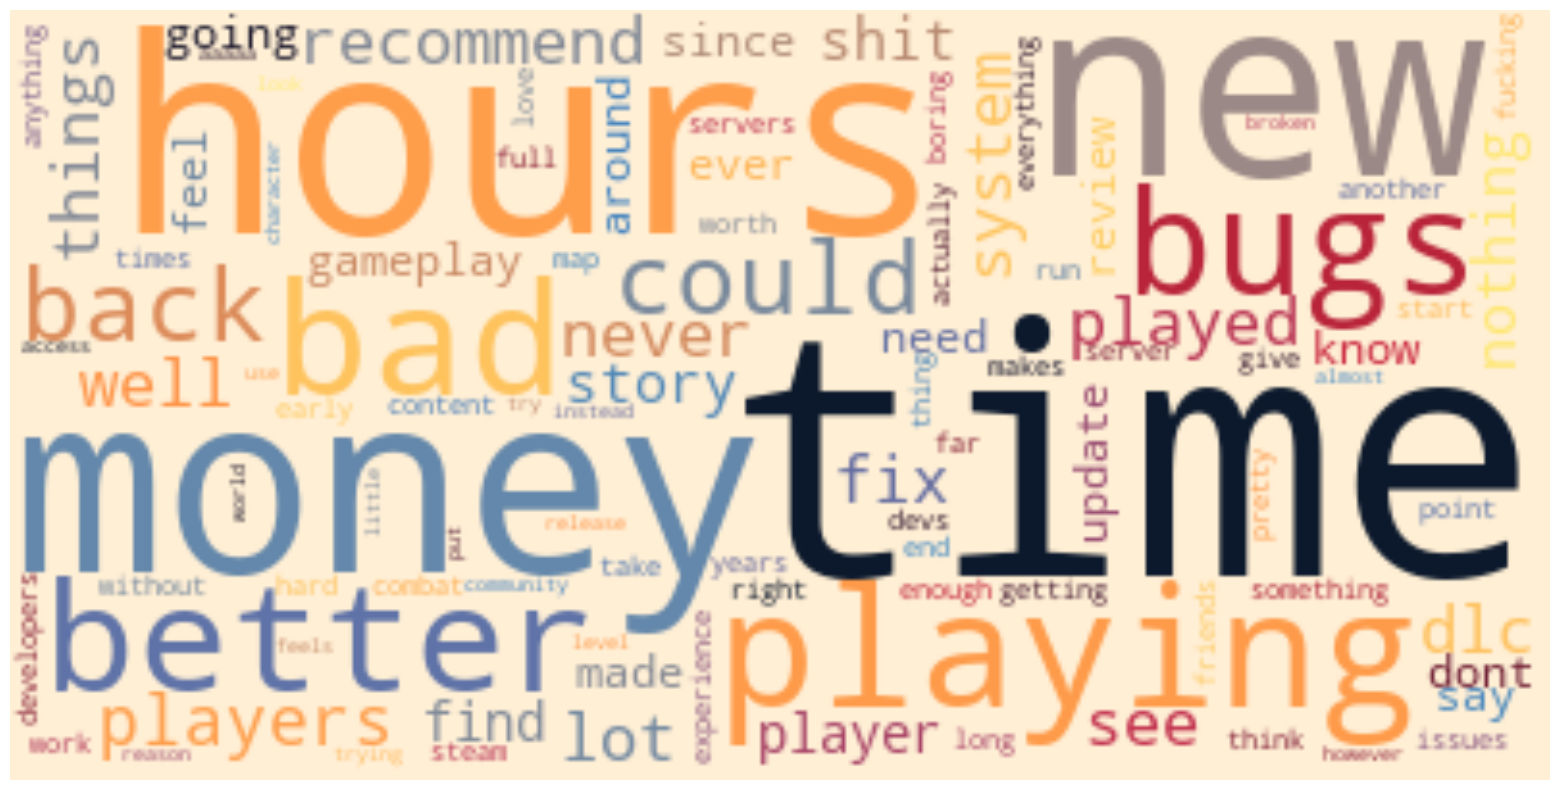

In [121]:
hero.wordcloud(negative['clean_review'], max_words=100,)

This shows the word cloud for all words appeared in reviews that are voted down. We can see some negative words such as "bad", "shit" and "bugs". We also see words such as money and hours. 

From here we can assume that the games were voted down due to long hour play, havings bugs and not worth the money.

In [97]:
new_cleanReviews = cleanReviewsTitle[['title', 'clean_review', 'voted_up', 'author.playtime_at_review', 'sentimental']]

In [98]:
new_cleanReviews.rename({'author.playtime_at_review': 'playtime'}, axis=1, inplace=True)

In [99]:
new_cleanReviews

,title,clean_review,voted_up,playtime,sentimental
1,7 days to die,great hope people check see selves,True,5269.0,1
3,7 days to die,haha bat hit zombie zombie head explode,True,6794.0,1
4,7 days to die,zombie go grrr gun go brrrrrr,True,6504.0,1
5,7 days to die,tthot thare wood blox,False,2508.0,-1
7,7 days to die,fun great friends good challenging times ...,True,762.0,1
...,...,...,...,...,...
4236899,the elder scrolls v skyrim,want see open world looking rpg year ...,True,5374.0,1
4236900,the elder scrolls v skyrim,easily one best rpg year,True,14070.0,1
4236902,the elder scrolls v skyrim,waifu simulator oh thank bethesda,True,4736.0,1
4236903,the elder scrolls v skyrim,get gnomers p fourms damned skyrim suck ...,True,31836.0,1


### processing the dataframe using for loop and texthero

In [100]:
# def chunks(lst, n):
#     #Yield successive n-sized chunks from lst
#     for i in range(0, len(lst), n):
#         yield lst[i:i + n]

# listof_new_cleanReviewsDF = list()
# for files in chunks(new_cleanReviews,100):
#     temp = files.clean_review
    
#     pcaSerie = (temp.pipe(hero.tfidf).pipe(hero.pca))
#     kmeansSerie = (temp.pipe(hero.tfidf).pipe(hero.kmeans))
#     playtimeSerie = files.playtime
#     titleSerie = files.title
    
#     sentimental = files.sentimental
#     combineCleanReviews = pd.concat([titleSerie, temp, pcaSerie, kmeansSerie, files.sentimental, playtimeSerie], axis=1).reset_index(drop=True)
#     print(combineCleanReviews)
#     listof_new_cleanReviewsDF.append(combineCleanReviews)


In [101]:
# new_cleanReviewsDF = pd.concat(listof_new_cleanReviewsDF)

# new_cleanReviewsDF.reset_index(drop=True)

# new_cleanReviewsDF.rename(columns={0: 'pca', 1: 'kmeans'}, inplace=True)

In [104]:
h5File = "fromdf.h5"

#saving to hdf file
#new_cleanReviewsDF.to_hdf(h5File, key='new_cleanReviewsDF')

In [105]:
#this take a while to load also but faster than processing
getClusterReview = pd.read_hdf('fromdf.h5', 'new_cleanReviewsDF') #load

In [106]:
getClusterReview = getClusterReview.reset_index(drop=True)

In [107]:
pca1 = []
pca2 = []

for element in getClusterReview['pca']:
    pca1.append(element[0])
    pca2.append(element[1])
    
getClusterReview['pca_A'] = pca1
getClusterReview['pca_B'] = pca2

In [122]:
getClusterReview_sample = getClusterReview.sample(n=1000)

#generate scatter plot
hero.scatterplot(getClusterReview_sample,'pca', color = 'kmeans', title="K-means Steam Game Reviews", hover_data=['clean_review'])

We can see that there are 4 clusters and they are clustering with each other. At first glance, we might assume there is not much difference in terms of the content of the review. 

However, before we conclude that data cannot be clustered. We need to take note that

- PCA is a linear transformation. The data may be more complicated than I have anticipated, therefore, I would need to introduce some non-linearity. This means that I should have use AutoEncoder to project the data into a lower dimensional space.
- Instead of using K-means, maybe I can try other algorithms like Gaussian Mixture Models or DBSCAN

#### cleaning before doing prediction

In [111]:
cleanReviewsTitle = cleanReviewsTitle.reset_index(drop=True)

df3 = getClusterReview.merge(steamUniqueTitleGenre[['title','genre']],on='title',how='left')

df3 = df3.dropna()

df3 = df3.reset_index(drop=True)

# for col in sorted(gen_cols):
#     col_name = col.lower().replace('&', 'and').replace(' ', '_')
#     gen_col_names.append(col_name)
        
#     df3[col_name] = df3['genre'].apply(lambda x: 1 if col in x.split(',') else 0)

df3['genre'] = df3['genre'].str.replace(',Early Access?', '')
df3['genre'] = df3['genre'].str.replace(',Early Access,?', '')

### predicting genre using review 

In [112]:
df3 = df3.loc[df3['sentimental'] == 1]
# random split train and test data
index = df3.index
df3['random_number'] = np.random.randn(len(index))
train_ = df3[df3['random_number'] <= 0.8]
test_ = df3[df3['random_number'] > 0.8]

# count vectorizer:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix_ = vectorizer.fit_transform(train_['clean_review'])
test_matrix_ = vectorizer.transform(test_['clean_review'])

X_train_ = train_matrix_
X_test_ = test_matrix_
y_train_ = train_['genre']
y_test_ = test_['genre']

lr.fit(X_train_,y_train_)

predictions_ = lr.predict(X_test_)

# find accuracy, precision
new_ = np.asarray(y_test_)
cf_matrix_ = confusion_matrix(predictions_,y_test_)

print(classification_report(predictions_,y_test_))

                                                                precision    recall  f1-score   support

                                                        Action       0.80      0.47      0.59     90826
                                              Action,Adventure       0.65      0.68      0.67     27578
                             Action,Adventure,Casual,Indie,RPG       0.43      0.83      0.57      2999
                                        Action,Adventure,Indie       0.58      0.79      0.67      6425
                  Action,Adventure,Indie,Massively Multiplayer       0.29      0.65      0.40       770
              Action,Adventure,Indie,Massively Multiplayer,RPG       0.34      0.61      0.44      3657
       Action,Adventure,Indie,Massively Multiplayer,Simulation       0.55      0.85      0.66      1132
                                    Action,Adventure,Indie,RPG       0.60      0.57      0.59     24521
                Action,Adventure,Indie,RPG,Simulation,Strategy 

### predicting whether the review is positive or negative

In [113]:
# random split train and test data
index = getClusterReview.index
getClusterReview['random_number'] = np.random.randn(len(index))
train = getClusterReview[getClusterReview['random_number'] <= 0.8]
test = getClusterReview[getClusterReview['random_number'] > 0.8]

Using count vectorizer from the Scikit-learn library to transform the text into a bag of words model. 
The number of occurrences of each word will be counted and printed.
We need to do this as the logistic regression algorithm cannot understand text.

              precision    recall  f1-score   support

          -1       0.52      0.82      0.64     53225
           1       0.98      0.93      0.95    557398

    accuracy                           0.92    610623
   macro avg       0.75      0.87      0.79    610623
weighted avg       0.94      0.92      0.93    610623



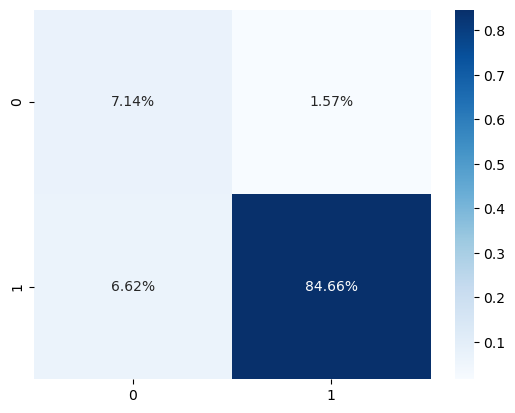

In [114]:
# count vectorizer:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['clean_review'])
test_matrix = vectorizer.transform(test['clean_review'])

X_train = train_matrix
X_test = test_matrix
y_train = train['sentimental']
y_test = test['sentimental']

lr.fit(X_train,y_train)

predictions = lr.predict(X_test)

# find accuracy, precision

new = np.asarray(y_test)
cf_matrix = confusion_matrix(predictions,y_test)

sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

print(classification_report(predictions,y_test))

The overall accuracy of the model on the test data is around 92% which is pretty good.

### predicting sentimental using reviews and genre

In [115]:
# train_ = train_.reset_index(drop=True)

# X_tfidf_train = vectorizer.fit_transform(train_['clean_review'])
# X_tfidf_test = vectorizer.transform(test_['clean_review'])

# X_train_categ = train_.iloc[:,9:19]
# X_test_categ = test_.iloc[:,9:19]

# yTrain = train_['sentimental']
# yTest = test_['sentimental']

# from scipy.sparse import hstack
# from sklearn.linear_model import Ridge

# XTrain = hstack([X_tfidf_train,X_train_categ])
# XTest = hstack([X_tfidf_test,X_test_categ])

# # Classifier: 
# clf = Ridge(alpha= 1000, random_state=241)

# # train model on data
# clf.fit(XTrain, yTrain) 

# predictions__ = clf.predict(XTest)

# print(np.sqrt(mean_squared_error(yTest,predictions__))) 
# print(r2_score(yTest, predictions__))